# Getting started with Task 2

Instructions:
- Download the dataset from the [ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)
- Unzip the `archive.zip` file
- Rename the folder `archive` as `ecg_dataset` and place it in the root of the git repository

References:
- [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

## Load dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

## MIT-BIH  Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
- Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.
- The final element of each row denotes the class to which that example belongs.


The shape of the mitbih_train is :  (87554, 188)
The shape of the mitbih_test is :  (21892, 188)
The last time value is :  1488.0


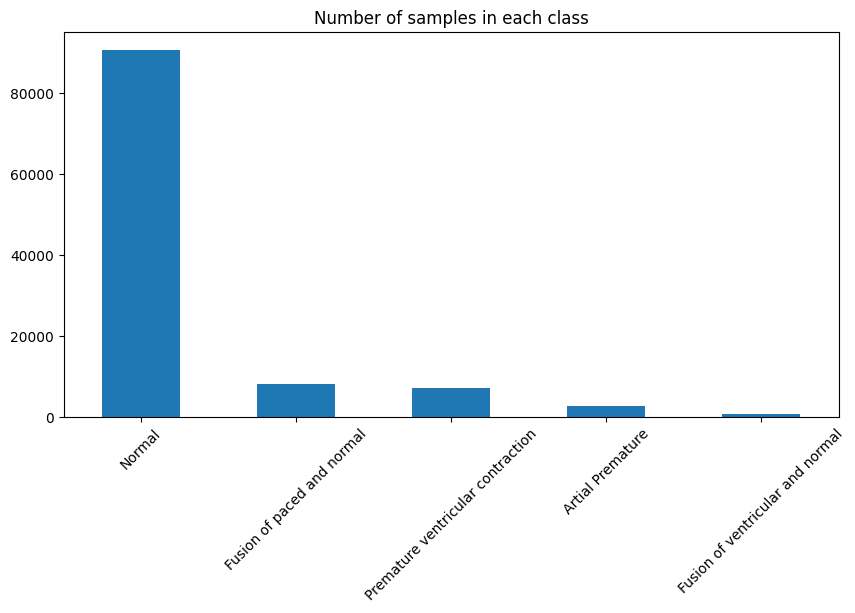

In [ ]:
df_mitbih_train = pd.read_csv("/content/mitbih_train.csv", header = None)
df_mitbih_test = pd.read_csv("/content/mitbih_test.csv", header = None)

# print shapes of the dataframes
print("The shape of the mitbih_train is : ", df_mitbih_train.shape)
print("The shape of the mitbih_test is : ", df_mitbih_test.shape)

df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'label'}, inplace=True)

id_to_label = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}
#df_mitbih['label'] = df_mitbih.iloc[:, -1].map(id_to_label)

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_mitbih.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_mitbih.columns = list(time) + ["label"]

# count the number of samples in each class and plot a bar chart
# change the class names to "normal" and "abnormal"
# count the number of samples in each class
counts = df_mitbih["label"].value_counts()
# substitute the class names
counts.index = counts.index.map(id_to_label)
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 45)
plt.title("Number of samples in each class")
plt.show()

In [ ]:
df_mitbih_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


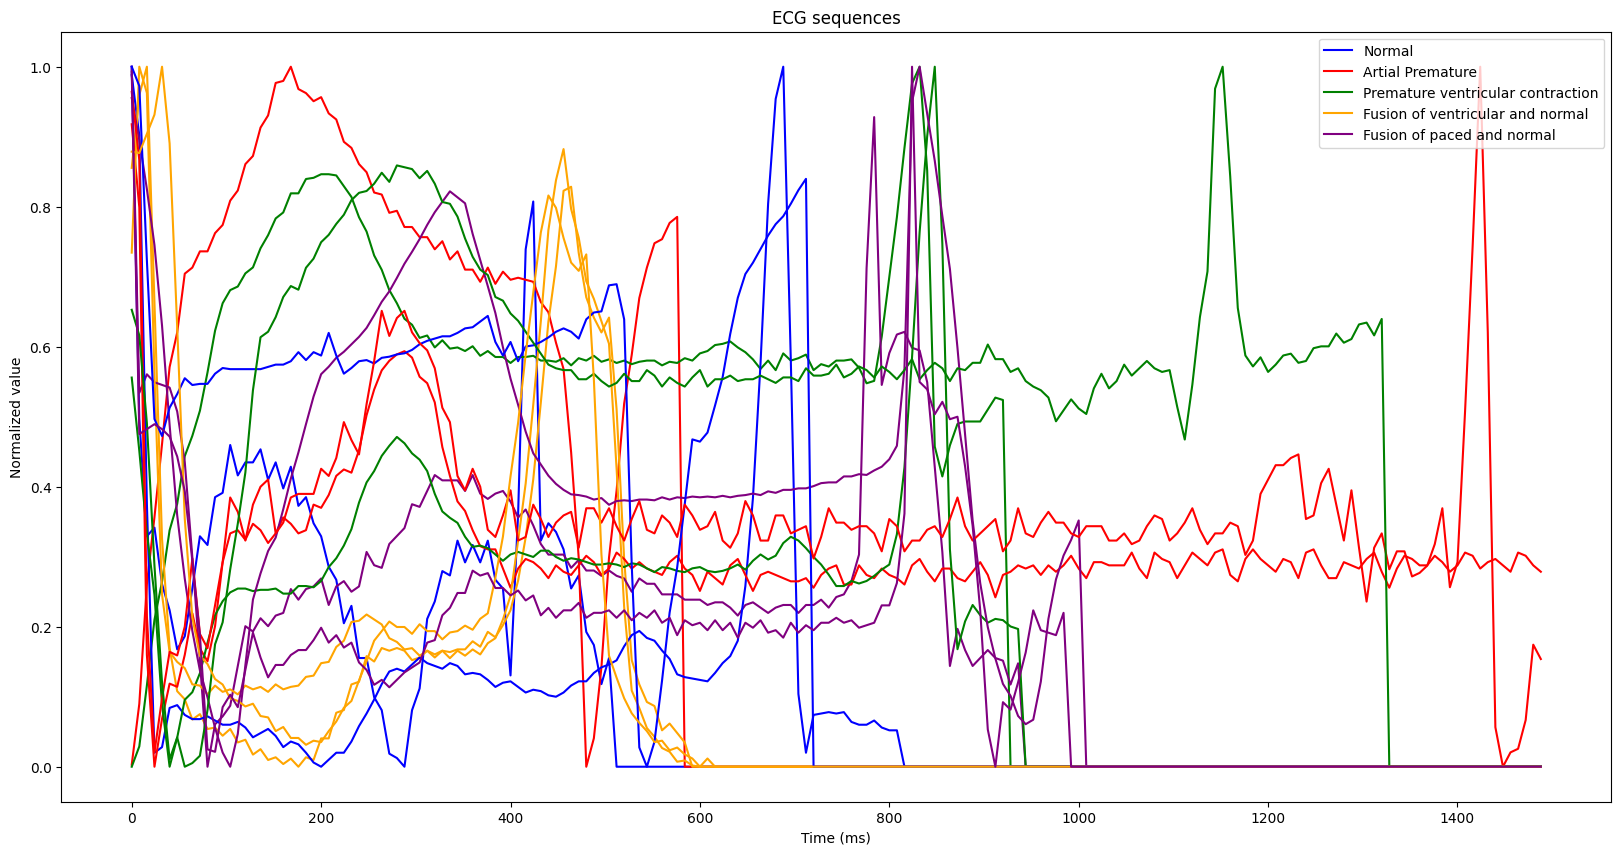

In [ ]:
# create a figure
plt.figure(figsize = (20, 10))
# define colors for each class
colors = ["blue", "red", "green", "orange", "purple"]
# plot the normal sequences
for i in range(3):
    for label in id_to_label.keys():
        # sample a random sequence from that label
        df_mitbih_label = df_mitbih[df_mitbih["label"] == label].sample(1)
        # plot the sequence
        if i == 0:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], label = id_to_label[label], color = colors[label])
        else:
            plt.plot(df_mitbih_label.columns[:-1], df_mitbih_label.iloc[0, :-1], color = colors[label])
# create a legend for the plot, blue for normal and red for abnormal
plt.legend()
# set the title
plt.title("ECG sequences")
# y lable is "Normalized value"
plt.ylabel("Normalized value")
# x label is "Time (ms)"
plt.xlabel("Time (ms)")
# show the plot
plt.show()
# close
plt.close()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import normalize

## Resampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.concat([df_mitbih_train, df_mitbih_test])
X = df.iloc[ :,0:187]
y = df.iloc[ :,187]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

## KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#X_train = df_mitbih_train.iloc[ :,0:187]
#y_train = df_mitbih_train.iloc[ :,187]
#X_test = df_mitbih_test.iloc[ :,0:187]
#y_test =df_mitbih_test.iloc[ :,187]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
 y_pred_KNN = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", accuracy)

Accuracy: 0.9723161260849703


In [ ]:
y_pred_KNN

array([0., 0., 0., ..., 0., 0., 4.])

In [ ]:
y_test[0:10]

9924     0.0
54798    0.0
141      0.0
13620    0.0
69205    0.0
4064     0.0
5395     0.0
87401    4.0
39946    0.0
78571    2.0
Name: 187, dtype: float64

In [ ]:
mean_absolute_error(y_test, y_pred)

0.04741891274554591

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

cm

array([[8854,   71,   63,   21,   10],
       [  60,  226,    7,    0,    1],
       [  31,    4,  701,    4,    2],
       [   5,    1,    9,   68,    0],
       [  10,    1,    3,    0,  793]])

<Axes: >

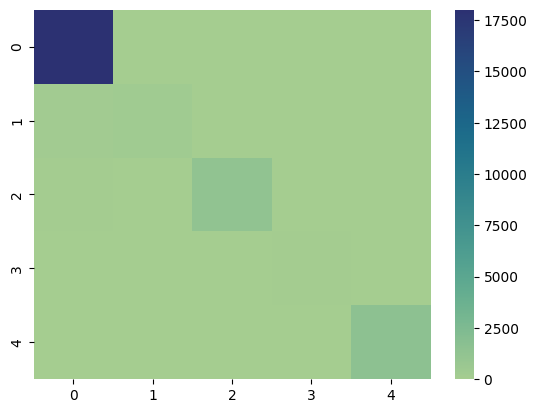

In [ ]:
sns.heatmap(cm, cmap="crest")

In [ ]:
a0=cm[0,0]/y_test.value_counts()[0]
print('Accuracy of Normal',a0)

a1= cm[1,1]/y_test.value_counts()[1]
print('Accuracy of Artial Premature',a1)

a2= cm[2,2]/y_test.value_counts()[2]
print('Accuracy of Premature ventricular contraction',a2)

a3= cm[3,3]/y_test.value_counts()[3]
print('Accuracy of Fusion of ventricular and normal',a3)

a4= cm[4,4]/y_test.value_counts()[4]
print('Accuracy of Fusion of paced and normal',a4)

Accuracy of Normal 0.995970857710564
Accuracy of Artial Premature 0.6258992805755396
Accuracy of Premature ventricular contraction 0.8832872928176796
Accuracy of Fusion of ventricular and normal 0.6234567901234568
Accuracy of Fusion of paced and normal 0.9533582089552238


## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(activation = 'relu', solver='adam', alpha=0.01,
                    hidden_layer_sizes=(35,), learning_rate='constant',
                    learning_rate_init=.01, max_iter = 1_000,
                    random_state = 42)

In [ ]:
ANN.fit(X_train, y_train) #TwoSuccessiveExamsAsFeatures, PassAsResponse)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(35,), learning_rate_init=0.01,
              max_iter=1000, random_state=42)

In [ ]:
y_pred_MLP = ANN.predict(X_test)

In [ ]:
ANN.score(X_test, y_test)

0.9336683417085427

In [ ]:
accuracy = accuracy_score(y_test, y_pred_MLP)
print("Accuracy:", accuracy)

Accuracy: 0.9336683417085427


In [ ]:
mean_absolute_error(y_test, y_pred_MLP)

0.12105984467793512

In [ ]:
mlp_vec = [y_test, y_pred_MLP]
np.savetxt("task_2_mlp.csv", mlp_vec, delimiter=",")

In [ ]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

cm

array([[18010,    18,    58,     3,    29],
       [  219,   322,    12,     0,     3],
       [  111,     2,  1316,    10,     9],
       [   42,     0,    41,    78,     1],
       [   42,     0,    15,     0,  1551]])

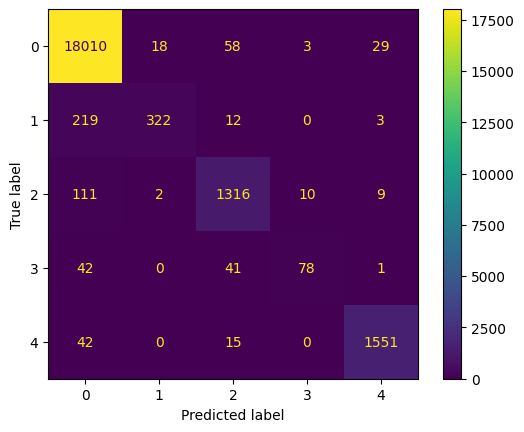

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

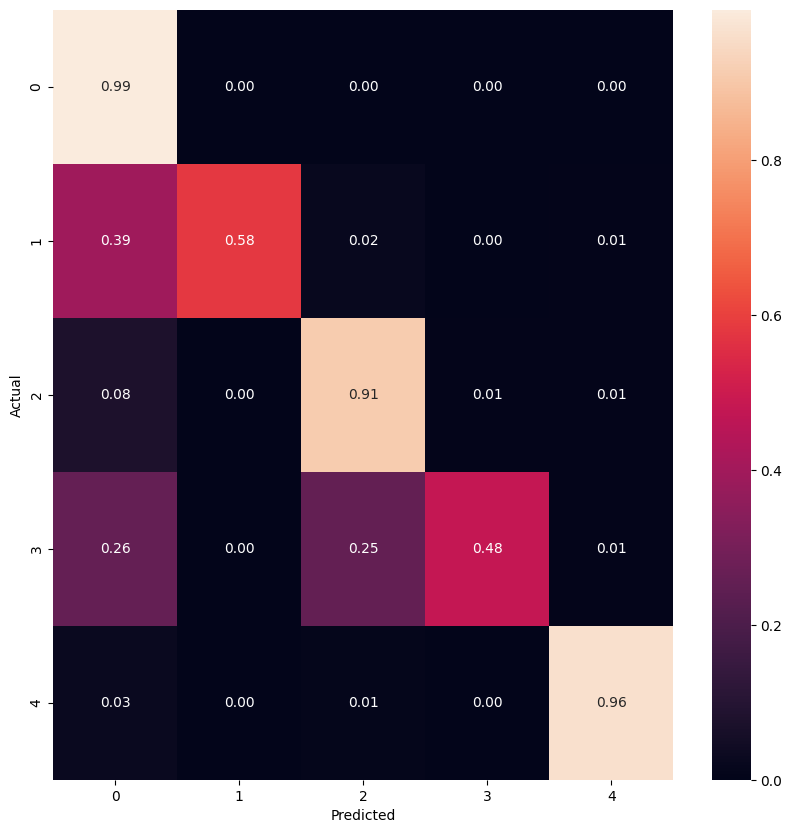

In [ ]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
######################################## CONFUSION MATRIX #######################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#======================== INPUTS =============================
y_test = y_test # True labels - list or 1D array
#class_names = np.array( [ "Normal", "Artial Premature","Premature ventricular contraction",
                    #     "Fusion of ventricular and normal","Fusion of paced and normal"])

class_names = np.array(["C1", "C2", "C3", "C4", "C5"])
y_pred = y_pred  # Predications - list or 1D array

#=============================================================
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = ",acc )
y = np.repeat(np.arange(0,5),5)

Accuracy =  0.9723161260849703


In [ ]:
y_test.value_counts()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64

In [ ]:
a0=cm[0,0]/y_test.value_counts()[0]
print('Accuracy of Normal',a0)

a1= cm[1,1]/y_test.value_counts()[1]
print('Accuracy of Artial Premature',a1)

a2= cm[2,2]/y_test.value_counts()[2]
print('Accuracy of Premature ventricular contraction',a2)

a3= cm[3,3]/y_test.value_counts()[3]
print('Accuracy of Fusion of ventricular and normal',a3)

a4= cm[4,4]/y_test.value_counts()[4]
print('Accuracy of Fusion of paced and normal',a4)

Accuracy of Normal 0.9940390771608345
Accuracy of Artial Premature 0.579136690647482
Accuracy of Premature ventricular contraction 0.9088397790055248
Accuracy of Fusion of ventricular and normal 0.48148148148148145
Accuracy of Fusion of paced and normal 0.9645522388059702


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import
df = pd.concat([df_mitbih_train, df_mitbih_test])
X = df.iloc[ :,0:187]
y = df.iloc[ :,187]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
CNB = CategoricalNB(alpha=0.2)

CNB.fit(X_train, y_train)

CategoricalNB(alpha=0.2)

In [ ]:
y_pred = CNB.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8332115121059844


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)
y_pred = CNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8332115121059844
